In [1]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import pymysql
import tensorflow as tf
#import mysql.connector
import datetime
import os

#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
from mysql.connector import Error 
from keras.layers import *
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
print("Enter the Stock Name from the below list \n")
print(os.listdir("C:\\Users\\Dell\\DatabaseJcomponent\\stockpredictionenv\\data"))
print("\n")
try:
    stock_name = input("Enter the Only Stock Name")
    df=pd.read_csv("data/"+stock_name+".csv")
    
    print("\n---Data before the pre processing---\n")
    print('Number of rows and columns:', df.shape)
    print(df.head(5))
    print(df.isnull().sum())
    processed_data = df.dropna()
    print(processed_data.isnull().sum())
    
except OSError as e:
    print("Data not avaliable for "+stock_name+". please Enter the valid stock name.")

def dataFrameToMySQL(processed_data):
    try:
        conn = pymysql.connect(host='localhost',port=int(3306),user='root',passwd='root',db='databasejcomponent')
        cur = conn.cursor()
        cur.execute("delete from datatable")
        conn.commit()
        
        for(row,rs) in processed_data.iterrows():
            now = rs[0]
            Open = str(float(rs[1]))
            High = str(float(rs[2]))
            Low = str(float(rs[3]))
            Close = str(float(rs[4]))
            AdjClose = str(float(rs[5]))  
            Volume = str(float(rs[6]))
            insert_query = "insert into datatable values('"+ now +"','"+ Open +"','"+ High +"','"+ Low +"','"+ Close +"','"+ AdjClose +"','"+ Volume +"')"
            cur.execute(insert_query)
        conn.commit()
        cur.close()
    except Error as e:
        print("Error in MySQL connection : ",e)
    finally:
        conn.close()

dataFrameToMySQL(processed_data)

Enter the Stock Name from the below list 

['FB.csv', 'GOOG.csv', 'NFLX.csv', 'TSLA.csv']


Enter the Only Stock NameFB

---Data before the pre processing---

Number of rows and columns: (1259, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2015-10-22   97.790001   99.730003   97.550003   99.669998   99.669998   
1  2015-10-23  101.910004  102.849998  100.160004  102.190002  102.190002   
2  2015-10-26  102.199997  103.809998  101.550003  103.769997  103.769997   
3  2015-10-27  102.940002  104.099998  102.400002  103.699997  103.699997   
4  2015-10-28  103.900002  104.480003  102.919998  104.199997  104.199997   

     Volume  
0  26392100  
1  42809700  
2  25961200  
3  23795500  
4  24081500  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [3]:
conn = pymysql.connect(host='localhost',port=int(3306),user='root',passwd='root',db='databasejcomponent')
df1 = pd.read_sql('SELECT * FROM datatable', con=conn)
print("\n---Data before the pre processing---\n")
print('Number of rows and columns:',df1.shape)
df1.head(5)


---Data before the pre processing---

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-22,97.790001,99.730003,97.550003,99.669998,99.669998,26392100
1,2015-10-23,101.910004,102.849998,100.160004,102.190002,102.190002,42809700
2,2015-10-26,102.199997,103.809998,101.550003,103.769997,103.769997,25961200
3,2015-10-27,102.940002,104.099998,102.400002,103.699997,103.699997,23795500
4,2015-10-28,103.900002,104.480003,102.919998,104.199997,104.199997,24081500


In [4]:
#we are selecting the Closeing price of the stock
#1260
#training set contains first 800 entry 
training_set = df1.iloc[:800, 4:5].values

#testing set contain remaining entry
test_set = df1.iloc[800:, 4:5].values

In [5]:
# Feature Scaling
# we scale the training data to 0 to 1  
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 50 time-steps and 1 output
# X_train contain past 50 days data not include today's data 
# y_train contain the specific day data, today's data

X_train = []
y_train = []

#we are createing the list that contain list of past 50 days data for each day
for i in range(50, 800):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
#convert into numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)
print(y_train)
print(X_train.shape)
print(y_train.shape)

[[0.04467321 0.06510457 0.07791465 ... 0.09777848 0.08513054 0.0653478 ]
 [0.06510457 0.07791465 0.07734712 ... 0.08513054 0.0653478  0.06948272]
 [0.07791465 0.07734712 0.08140095 ... 0.0653478  0.06948272 0.07142855]
 ...
 [0.46392089 0.47989301 0.48305499 ... 0.40132967 0.31684776 0.31814489]
 [0.47989301 0.48305499 0.4812713  ... 0.31684776 0.31814489 0.24963511]
 [0.48305499 0.4812713  0.5239176  ... 0.31814489 0.24963511 0.24241929]]
[[[0.04467321]
  [0.06510457]
  [0.07791465]
  ...
  [0.09777848]
  [0.08513054]
  [0.0653478 ]]

 [[0.06510457]
  [0.07791465]
  [0.07734712]
  ...
  [0.08513054]
  [0.0653478 ]
  [0.06948272]]

 [[0.07791465]
  [0.07734712]
  [0.08140095]
  ...
  [0.0653478 ]
  [0.06948272]
  [0.07142855]]

 ...

 [[0.46392089]
  [0.47989301]
  [0.48305499]
  ...
  [0.40132967]
  [0.31684776]
  [0.31814489]]

 [[0.47989301]
  [0.48305499]
  [0.4812713 ]
  ...
  [0.31684776]
  [0.31814489]
  [0.24963511]]

 [[0.48305499]
  [0.4812713 ]
  [0.5239176 ]
  ...
  [0.3181

In [6]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs =100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0562
Epoch 2/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0093
Epoch 3/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0063
Epoch 4/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0059
Epoch 5/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0057
Epoch 6/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0066
Epoch 7/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0058
Epoch 8/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0057
Epoch 9/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0052
Epoch 10/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0051
Epoch 11/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0048
Epoch 12/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0052
Epoch 13/100
24/24 [=====

In [7]:
# select 0 to 799 values of open price of stock
dataset_train = df1.iloc[:800, 1:2]
#select 800 to remaining values of open price of stock for testing 
dataset_test = df1.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

#len(dataset_total) = 1260
#len(dataset_test) = 460
#len(dataset_train) = 800
#len(inputs) = 740
#We are predict output for 740 days 

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs)

#-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis. E.g,
#If you have an array of shape (2,4) then reshaping it with (-1, 1), 
#[][][][]
#[][][][]
#[][][][][][][][]
#then the array will get reshaped in such a way that the resulting array has only 1 column 
#and this is only possible by having 8 rows, hence, (8,1).

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs)
X_test = []
y_test = []
for i in range(60, 519):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

[[163.029999]
 [161.580002]
 [160.      ]
 [161.460007]
 [159.210007]
 [155.539993]
 [157.690002]
 [156.820007]
 [150.130005]
 [156.729996]
 [153.320007]
 [155.399994]
 [159.559998]
 [158.509995]
 [155.860001]
 [154.759995]
 [151.220001]
 [154.279999]
 [147.729996]
 [145.820007]
 [148.5     ]
 [139.940002]
 [155.      ]
 [151.520004]
 [151.800003]
 [150.100006]
 [149.309998]
 [151.570007]
 [150.490005]
 [146.75    ]
 [144.479996]
 [142.      ]
 [143.699997]
 [142.330002]
 [141.070007]
 [137.610001]
 [127.029999]
 [134.399994]
 [133.649994]
 [133.      ]
 [135.75    ]
 [136.279999]
 [135.919998]
 [138.259995]
 [143.      ]
 [140.729996]
 [133.820007]
 [139.25    ]
 [139.600006]
 [143.880005]
 [143.080002]
 [145.570007]
 [143.339996]
 [143.080002]
 [141.080002]
 [141.210007]
 [130.699997]
 [133.389999]
 [123.099998]
 [126.      ]
 [132.440002]
 [135.339996]
 [134.449997]
 [128.990005]
 [134.690002]
 [134.009995]
 [137.559998]
 [139.889999]
 [142.949997]
 [143.080002]
 [143.149994]
 [142.

In [8]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

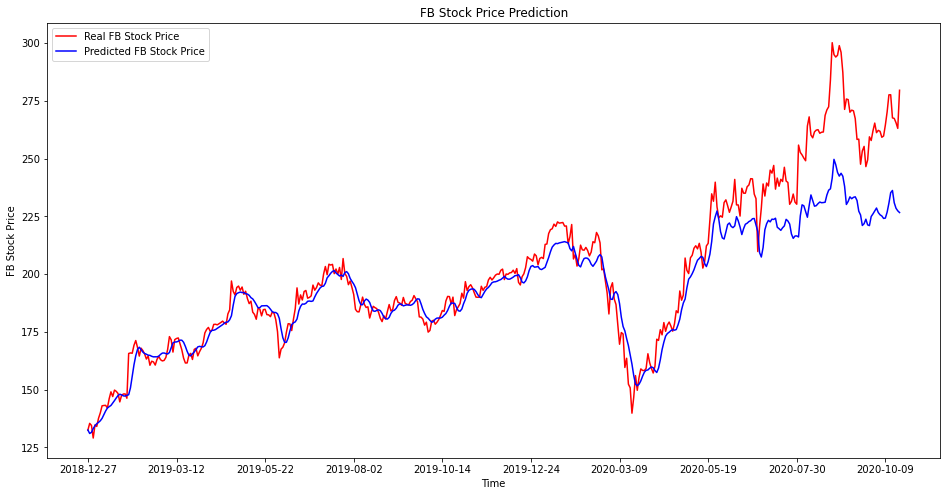

In [9]:
# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(df1.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real '+stock_name+' Stock Price')
plt.plot(df1.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted '+stock_name+' Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title(stock_name+' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(stock_name+' Stock Price')
plt.legend()
plt.show()

In [10]:
print(df1.loc[1258:, 'Date'])
print(predicted_stock_price[-1])


1258    2020-10-21
Name: Date, dtype: object
[226.61815]
